In [89]:
import cv2
import numpy
import os
import matplotlib

In [90]:
COLOR_RED = (0, 0, 255)

# The current working directory
image_dir = os.getcwd()

In [91]:
# Load the source image to perform feature matching on
image_bgr = cv2.imread(filename=image_dir + '/find_waldo.png', flags=cv2.IMREAD_COLOR)

In [92]:
# Convert the source image to grayscale
image_gray = cv2.cvtColor(src=image_bgr, code=cv2.COLOR_BGR2GRAY)

In [93]:
# Load the template image to search for, in grayscale
template = cv2.imread(filename=image_dir + '/waldo.png', flags=cv2.IMREAD_GRAYSCALE)
template_height, template_width = template.shape

In [94]:
# Slide the template over the image, and return the comparison results as a matrix
comparison = cv2.matchTemplate(image=image_gray, templ=template, method=cv2.TM_CCOEFF_NORMED)

In [95]:
# Draw a red rectangle around the locations that exceed the given threshold of comparison matching
threshold = 0.6
locations = numpy.where(comparison >= threshold)
for top_left_point in zip(*locations[::-1]):
    top_left_point_x = top_left_point[0]
    top_left_point_y = top_left_point[1]
    bottom_right_point_x = top_left_point_x + template_width
    bottom_right_point_y = top_left_point_y + template_height
    bottom_right_point = (bottom_right_point_x, bottom_right_point_y)
    cv2.rectangle(img=image_bgr, pt1=top_left_point,
                  pt2=bottom_right_point, color=COLOR_RED, thickness=cv2.LINE_4)

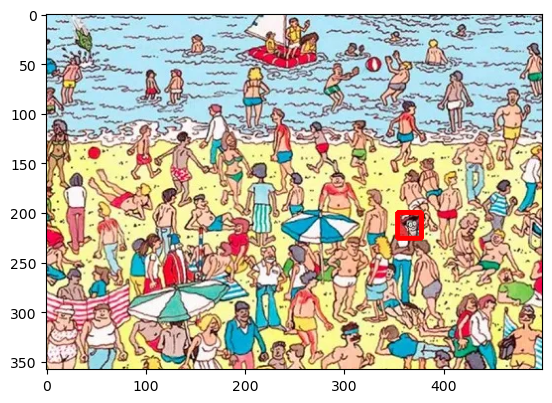

In [96]:
# Save the new image with the marked location
cv2.imwrite(filename='found_waldo.png', img=image_bgr)
image_rgb = cv2.cvtColor(src=image_bgr, code=cv2.COLOR_BGR2RGB)
matplotlib.pyplot.imshow(X=image_rgb)
matplotlib.pyplot.show()